# Factor Models Demo

In [1]:
## Import packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] =12
plt.rcParams['ytick.labelsize'] =12

import importlib as imp
import FactorModelLib as fm
import config

import warnings 
warnings.filterwarnings('ignore')

In [2]:
all_data = pd.read_csv(U"C:/Users/YUAN PUEN/Desktop/金融工程/JupyterLab/Data/Data_Oct2018_v2.csv")
all_data[config.dateName] = pd.to_datetime(all_data[config.dateName])

In [3]:
all_data.head()

,Date,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection,Regime-5,Regime-7,US Equities,Real Estate,Commodities,Corp Bonds
0,1985-01-01,0.028511,0.031500,0.006408,-0.016265,0.030292,1,1,0.081301,0.056605,0.021351,0.048963
1,1985-02-01,-0.009204,-0.044692,0.057381,0.006362,0.010258,1,1,0.030075,0.016448,-0.015217,-0.042029
2,1985-03-01,0.075134,0.028719,-0.024396,-0.002848,-0.020739,1,1,-0.007299,-0.006716,0.037171,0.032666
3,1985-04-01,-0.002459,0.023084,-0.004869,0.003089,0.008187,1,1,-0.012255,0.000906,-0.035116,0.037125
4,1985-05-01,0.040245,0.086780,-0.044417,0.004077,-0.002219,1,1,0.064516,0.027241,0.004351,0.104199


In [4]:
# We are going to use the first five columns as the factors and the US Equities, Real Estate, Commodities, Corp Bond in the right hand to explain the five factors

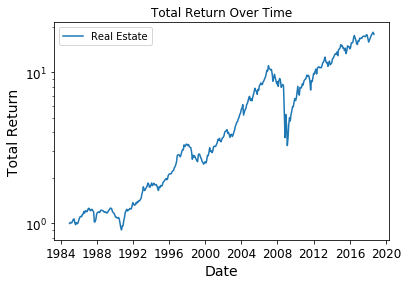

In [5]:
name = 'Real Estate'
fm.plot_returns(all_data, name,flag='Total Return')

In [6]:
all_data.sort_values('US Equities').head(3)

,Date,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection,Regime-5,Regime-7,US Equities,Real Estate,Commodities,Corp Bonds
33,1987-10-01,-0.145045,0.068928,-0.101626,-0.010618,-0.025647,-1,-1,-0.227451,-0.142819,-0.013019,0.047145
285,2008-10-01,-0.204945,-0.039976,-0.112578,-0.083037,0.024725,-1,-1,-0.173147,-0.312202,-0.295256,-0.068198
286,2008-11-01,-0.111894,0.154699,-0.249246,-0.044064,-0.010747,-1,-1,-0.162932,-0.337308,-0.175630,0.053776


### In this demo, we will try to explain the real estate returns by using other factors like US Equities...

In [35]:
# From ML perspective, the factors are equivalent to features and the betas are called factor loadings

## Factor Modelling Review

### What is a factor model?
<font color = 'blue'>
\begin{equation}
R_t - r_t = \mu + \beta_1F_1t + ... + \beta_k F_kt + \epsilon_t
\end{equation}
</font>

其中


-$F_jt$ is the excess return on the factor $j$ at date $t$ ($j$ = 1,2,...,k)

-$\epsilon_t$ is the asset specific return

-$\beta_j$ measures the sensitivity of $R$ to factor $j$

### This is an OLS regression

<font color = 'blue'>
\begin{equation}
    \hat\beta^{\text{OLS}} = argmin_{\beta}\bigg\{\sum_{t=1}^{n} (y_t - {X_t}^T {\bf\beta})^2\bigg\}
\end{equation}
</font>

In [8]:
startDate = all_data[config.dateName].min()
endDate = all_data[config.dateName].max()

In [52]:
# Linear Regression(OLS)
Factors = all_data[config.factorName].values
Assets = all_data[config.assetName].values

Asset_RE = Assets[:,1]
Factors_ones = np.concatenate((np.ones((all_data.shape[0],1)),Factors),axis=1)
theory_beta = np.linalg.inv(Factors_ones.T.dot(Factors_ones)).dot(Factors_ones.T).dot(Asset_RE)
print('Dependent variable is Real Estate')
print('Historical Timeperiods' + fm.num_to_month(startDate.month) + " " + str(startDate.year) + fm.num_to_month(endDate.month) + " " + str(endDate.year))
opt = dict()
opt['nameOfReg'] = 'theory_beta'
fm.display_factor_loadings(theory_beta[0], theory_beta[1:], config.factorName, opt)

Dependent variable is Real Estate
Historical TimeperiodsJanuary 1985September 2018
             Intercept  World Equities  US Treasuries  Bond Risk Premium  \
theory_beta  -0.003587        0.310261       1.212508           1.054238   

             Inflation Protection  Currency Protection  
theory_beta              0.287919              0.36184  


In [10]:
#Linear Regression via Scikit-learn
options = fm.create_options()
options['nameOfReg'] = 'scilit-learn OLS'
fm.linear_regression(all_data, 'Real Estate',config.factorName,options)

Dependent Variable is Real Estate
Time period is between January 1985 to September 2018 inclusive   
                  Intercept  World Equities  US Treasuries  Bond Risk Premium  \
scilit-learn OLS  -0.003587        0.310261       1.212508           1.054238   

                  Inflation Protection  Currency Protection  
scilit-learn OLS              0.287919              0.36184  


## Drawback of OLS: Noise Filtering

+ The OLS model cannot distinguish the good factor and the noisy factor, it deals  with them equally

In [11]:
# Calculate a noise variable
std = all_data['World Equities'].std()*(2)
nPeriods = all_data.shape[0]
np.random.seed(1245)
noise = np.random.normal(loc=0, size = (nPeriods))
noise = np.reshape(std*noise + np.array(all_data['World Equities']),(nPeriods,1))
all_data['Noise'] = noise
factorNameWithNoise = config.factorName + ['Noise']

In [12]:
options = fm.create_options()
options['nameOfReg'] = 'OLS with Noise'
fm.linear_regression(all_data,'Real Estate',factorNameWithNoise,options)

Dependent Variable is Real Estate
Time period is between January 1985 to September 2018 inclusive   
                Intercept  World Equities  US Treasuries  Bond Risk Premium  \
OLS with Noise  -0.003654        0.323065       1.214039           1.054216   

                Inflation Protection  Currency Protection     Noise  
OLS with Noise              0.283488             0.361987 -0.010582  


In [13]:
# We can observe that the OLS model assign a coefficient to the Noise factor 

## Drawback of PLS : Regime Dependance
- They assume factor loadings are constant over time

In [14]:
# Divide the all_data into 2 regimes: Normal data(Prices go up) and crash data(prices go down)

In [15]:
options['nameOfReg'] = 'OLS full data'
fm.linear_regression(all_data, 'Real Estate',config.factorName,options)

Dependent Variable is Real Estate
Time period is between January 1985 to September 2018 inclusive   
               Intercept  World Equities  US Treasuries  Bond Risk Premium  \
OLS full data  -0.003587        0.310261       1.212508           1.054238   

               Inflation Protection  Currency Protection  
OLS full data              0.287919              0.36184  


In [16]:
normalData = all_data[all_data['US Equities'] > 0].copy()
options['nameOfReg'] = 'OLS Normal'
fm.linear_regression(normalData,'Real Estate',config.factorName, options)

Dependent Variable is Real Estate
Time period is between January 1985 to September 2018 inclusive   
            Intercept  World Equities  US Treasuries  Bond Risk Premium  \
OLS Normal    0.00348         0.15022        1.30286           1.100558   

            Inflation Protection  Currency Protection  
OLS Normal              0.210193              0.05183  


In [17]:
crashData = all_data[all_data['US Equities'] <= 0].copy()
options['nameOfReg'] = 'OLS Crash'
fm.linear_regression(crashData,'Real Estate',config.factorName,options)

Dependent Variable is Real Estate
Time period is between March 1985 to June 2018 inclusive   
           Intercept  World Equities  US Treasuries  Bond Risk Premium  \
OLS Crash  -0.011274        0.365824       0.959781           0.792532   

           Inflation Protection  Currency Protection  
OLS Crash              0.540801             0.588727  


Notice how the coefficients change dramatically

To address the problem, we can use the LASSO Regression

the LASSO regression can not only filter out the noise factor but also shrink other factors effect

### Mathematical Definition
<font color ='blue'>
\begin{equation}
    \hat\beta^{\text{LASSO}} = argmin_{\beta}\bigg\{\sum_{t=1}^{n} (y_t - {X_t}^T {\beta})^2 + \lambda \sum_{j=1}^{m}|\beta_j|\bigg\}
\end{equation}
</font>

#### <font color = 'darkblue'> Advantages </font>
+ It shrinks the coefficients, sometimes setting some to zero
+ It can filter out noise variables and can therefore be used for variable selection

ONLY CONCERNS: How to choose $\lambda$ value? 
- Higher $\lambda$ value means higher penalty

In [18]:
options = fm.create_options_lasso()
options['lambda'] = .1
options['printLoadings'] = True
options['nameOfReg'] = 'LASSO Regression'
fm.lasso_regression(all_data,'Real Estate',config.factorName,options)

Dependent Variable is Real Estate
Time period is between January 1985 to September 2018 inclusive   
lambda = 0.1
                  Intercept  World Equities  US Treasuries  Bond Risk Premium  \
LASSO Regression   0.001834        0.349738         0.5422           0.574002   

                  Inflation Protection  Currency Protection  
LASSO Regression                   0.0                  0.0  


In [19]:
options = fm.create_options_lasso()
options['lambda'] = .1
options['printLoadings'] = True
options['nameOfReg'] = 'LASSO Reg with Noise'
fm.lasso_regression(all_data,'Real Estate',factorNameWithNoise,options)

Dependent Variable is Real Estate
Time period is between January 1985 to September 2018 inclusive   
lambda = 0.1
                      Intercept  World Equities  US Treasuries  \
LASSO Reg with Noise   0.001834        0.349738         0.5422   

                      Bond Risk Premium  Inflation Protection  \
LASSO Reg with Noise           0.574002                   0.0   

                      Currency Protection  Noise  
LASSO Reg with Noise                  0.0    0.0  


## Problem: What lambda is appropriate?

In [20]:
options = fm.create_options_cv_lasso()
options['nameOfReg'] = 'CV Lasso'
fm.cross_validated_lasso_regression(all_data, 'Real Estate',config.factorName + ['Noise'], options)

alphaMax = 0.00030864197530864197
Best Alpha
8.17948622022696e-05
Dependent Variable is Real Estate
Time period is between January 1985 to September 2018 inclusive   
best lambda = 0.06625383838383839
          Intercept  World Equities  US Treasuries  Bond Risk Premium  \
CV Lasso   0.000441        0.324436       0.759458           0.748534   

          Inflation Protection  Currency Protection  Noise  
CV Lasso                   0.0                  0.0   -0.0  


### modern Method 2: Elastic Net
<font color = 'blue'>
\begin{equation}
\hat\beta^{\text{Elastic Net}} = argmin_{\beta}\bigg\{\sum_{t=1}^{n} (y_t - X_t^T \beta)^2 + \lambda_1 \sum_{j=1}^{m}|\beta_j| + \lambda_2||\beta||_2^2\bigg\}
\end{equation}
</font>


+ Pros and cons

It combines the theoretical advantages of LASSO and Ridge Regression(it can shrink the factor loadings without setting them to 0)

In [21]:
options = fm.create_options_cv_elastic_net()
options['nameOfReg']='CV Elastic Net With Noise'
fm.cross_validated_elastic_net_regression(all_data,'Real Estate',config.factorName + ['Noise'], options)

Dependent Variable is Real Estate
Time period is between January 1985 to September 2018 inclusive   
best lambda1 = 0.0662524163265306
best lambda2 = 0.00033460816326530635
                           Intercept  World Equities  US Treasuries  \
CV Elastic Net With Noise   0.000462        0.325007        0.75604   

                           Bond Risk Premium  Inflation Protection  \
CV Elastic Net With Noise           0.745728                   0.0   

                           Currency Protection  Noise  
CV Elastic Net With Noise                  0.0   -0.0  
